# This notebook conducts exploratory data analysis (EDA) following a thorough cleaning process that involves removing rows and columns with missing values. After this initial cleaning, we delve into specific columns to gain deeper insights and identify potential candidates for data enrichment. 
<br>



In [1]:
import pandas as pd
pd.set_option('max_colwidth', None) # show all text in a column
pd.set_option('display.max_columns', None) # show all columns
pd.set_option('display.float_format', lambda x: '%.0f' % x)
pd.options.display.float_format = '{:,.0f}'.format

from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

from utils import clean_data,detect_language, preprocess

In [2]:
BMBF = pd.read_csv('../data/BMBF.csv',encoding='latin1',sep=';')
BMBF.head()

,"=""FKZ""","=""Ressort""","=""Referat""","=""PT""","=""Arb.-Einh.""","=""Zuwendungsempfänger""","=""Gemeindekennziffer""","=""Stadt/Gemeinde""","=""Ort""","=""Bundesland""","=""Staat""","=""Ausführende Stelle""","=""Gemeindekennziffer"".1","=""Stadt/Gemeinde"".1","=""Ort"".1","=""Bundesland"".1","=""Staat"".1","=""Thema""","=""Leistungsplansystematik""","=""Klartext Leistungsplansystematik""","=""Laufzeit von""","=""Laufzeit bis""","=""Fördersumme in EUR""","=""Förderprofil""","=""Verbundprojekt""","=""Förderart""",Unnamed: 26
0,"=""03F0212C/7""","=""BMBF""","=""724""","=""PT-J""","=""MGS1""","=""Universität Rostock""","=""13003000""","=""Rostock""","=""Rostock""","=""Mecklenburg-Vorpommern""","=""Deutschland""","=""Universität Rostock - Fachbereich Elektrotechnik und Informationstechnik""","=""13003000""","=""Rostock""","=""Rostock""","=""Mecklenburg-Vorpommern""","=""Deutschland""","=""Verbundprojekt MESSIN: Entwicklung und Systemintegration der Komponenten Navigation, Automatische Steuerung, Kommunikation und Energieversorgung für den Meßdelphin MESSIN""","=""FB4010""","=""Technik-/Infrastrukturentwicklung und -bereitstellung (Überwachungssysteme, Begleitforschung zum Monitoring, innovative Technik und Geräteträger)""","=""01.01.1998""","=""31.08.2000""","648.462,00","=""Forschung und Entwicklung zur Daseinsvorsorge""","=""MESSIN""","=""PDIR""",NaN
1,"=""D251800 /0""","=""BMBF""","=""314""","=""BIBB""","=""A3.3""","=""Ministerium für Wirtschaft, Arbeit und Wohnungsbau Baden-Württemberg""","=""08111000""","=""Stuttgart""","=""Stuttgart""","=""Baden-Württemberg""","=""Deutschland""","=""KACO new energy GmbH""","=""08121000""","=""Heilbronn""","=""Heilbronn""","=""Baden-Württemberg""","=""Deutschland""","=""Prozeßorientierte Entwicklungsplanung und Qualifizierung im Betrieb""","=""OB1050""","=""Versuchs- und Modelleinrichtungen und -programme im Bereich der beruflichen Bildung""","=""01.07.1997""","=""30.06.2000""","96.634,00","=""Forschung und Entwicklung zur Daseinsvorsorge""","=""""","=""PDIR""",NaN
2,"=""D251800B/2""","=""BMBF""","=""314""","=""BIBB""","=""A3.3""","=""Ministerium für Wirtschaft, Arbeit und Wohnungsbau Baden-Württemberg""","=""08111000""","=""Stuttgart""","=""Stuttgart""","=""Baden-Württemberg""","=""Deutschland""","=""CALA e.V.""","=""08118019""","=""Gerlingen""","=""Gerlingen""","=""Baden-Württemberg""","=""Deutschland""","=""Wiss. Begl. zum MV 'Prozeßorientierte Entwicklungsplanung und Qualifizierung im Betrieb""","=""OB1050""","=""Versuchs- und Modelleinrichtungen und -programme im Bereich der beruflichen Bildung""","=""01.07.1997""","=""30.06.2000""","157.457,00","=""Forschung und Entwicklung zur Daseinsvorsorge""","=""""","=""PDIR""",NaN
3,"=""50WM9821/6""","=""BMWi""","=""IVD5""","=""DLR-RFM""","=""AR-AF""","=""Fraunhofer-Gesellschaft zur Förderung der angewandten Forschung eingetragener Verein""","=""09162000""","=""München""","=""München""","=""Bayern""","=""Deutschland""","=""Fraunhofer-Gesellschaft zur Förderung der angewandten Forschung eingetragener Verein""","=""09162000""","=""München""","=""München""","=""Bayern""","=""Deutschland""","=""Untersuchung des Schäumens von Metallen unter variierten Schwerkraftbedingungen""","=""IB3010""","=""Forschung unter Weltraumbedingungen - Materialwissenschaften""","=""01.03.1998""","=""31.12.2001""","452.356,00","=""Technologie- und Innovationsförderung""","=""""","=""PDIR""",NaN
4,"=""50WB9716/8""","=""BMWi""","=""IVD5""","=""DLR-RFM""","=""AR-AF""","=""Universität Hohenheim""","=""08111000""","=""Stuttgart""","=""Stuttgart""","=""Baden-Württemberg""","=""Deutschland""","=""Universität Hohenheim - Fakultät Naturwissenschaften - Institut für Physiologie""","=""08111000""","=""Stuttgart""","=""Stuttgart""","=""Baden-Württemberg""","=""Deutschland""","=""Der Einfluß verschiedener Gravitationsbedingungen auf das Verhalten künstlicher und nativer Ionenkanäle""","=""IB3020""","=""Forschung unter Weltraumbedingungen - Biowissenschaften und Medizin""","=""01.01.

In [3]:
BMBF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272244 entries, 0 to 272243
Data columns (total 27 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ="FKZ"                               272244 non-null  object 
 1   ="Ressort"                           272244 non-null  object 
 2   ="Referat"                           272244 non-null  object 
 3   ="PT"                                272244 non-null  object 
 4   ="Arb.-Einh."                        272244 non-null  object 
 5   ="Zuwendungsempfänger"               272244 non-null  object 
 6   ="Gemeindekennziffer"                272244 non-null  object 
 7   ="Stadt/Gemeinde"                    272244 non-null  object 
 8   ="Ort"                               272244 non-null  object 
 9   ="Bundesland"                        272244 non-null  object 
 10  ="Staat"                             272244 non-null  object 
 11  ="Ausführende

In [4]:
# the data set comprises of 27 columns, 1 column " Unnamed: 26" contains only undefined objects.
# first of all, we remove this column and all unrelevant character such as = and " 
BMBF = clean_data(BMBF)

In [5]:
BMBF.head(2)

,FKZ,Ressort,Referat,PT,Arb.-Einh.,Zuwendungsempfänger,Gemeindekennziffer,Stadt/Gemeinde,Ort,Bundesland,Staat,Ausführende Stelle,Gemeindekennziffer.1,Stadt/Gemeinde.1,Ort.1,Bundesland.1,Staat.1,Thema,Leistungsplansystematik,Klartext Leistungsplansystematik,Laufzeit von,Laufzeit bis,Fördersumme in EUR,Förderprofil,Verbundprojekt,Förderart
0,03F0212C/7,BMBF,724,PT-J,MGS1,Universität Rostock,13003000,Rostock,Rostock,Mecklenburg-Vorpommern,Deutschland,Universität Rostock - Fachbereich Elektrotechnik und Informationstechnik,13003000,Rostock,Rostock,Mecklenburg-Vorpommern,Deutschland,"Verbundprojekt MESSIN: Entwicklung und Systemintegration der Komponenten Navigation, Automatische Steuerung, Kommunikation und Energieversorgung für den Meßdelphin MESSIN",FB4010,"Technik-/Infrastrukturentwicklung und -bereitstellung (Überwachungssysteme, Begleitforschung zum Monitoring, innovative Technik und Geräteträger)",01.01.1998,31.08.2000,"648.462,00",Forschung und Entwicklung zur Daseinsvorsorge,MESSIN,PDIR
1,D251800/0,BMBF,314,BIBB,A3.3,"Ministerium für Wirtschaft, Arbeit und Wohnungsbau Baden-Württemberg",08111000,Stuttgart,Stuttgart,Baden-Württemberg,Deutschland,KACO new energy GmbH,08121000,Heilbronn,Heilbronn,Baden-Württemberg,Deutschland,Prozeßorientierte Entwicklungsplanung und Qualifizierung im Betrieb,OB1050,Versuchs- und Modelleinrichtungen und -programme im Bereich der beruflichen Bildung,01.07.1997,30.06.2000,"96.634,00",Forschung und Entwicklung zur Daseinsvorsorge,,PDIR


In [6]:
#there are no duplicate 
BMBF.duplicated().sum()

0

In [7]:
# There are many missing values "hiding" in empty value 

In [8]:
BMBF.replace("",pd.NA, inplace=True)
# many missing value
BMBF.isnull().sum().sum()

179346

In [9]:
#check missing value of each column
missing_values = dict()
for col in BMBF.columns:
    if any(BMBF[col].isnull()):
        missing_values[col] = BMBF[col].isnull().sum()
        
pd.Series(missing_values).sort_values(ascending=False)

Verbundprojekt                      147101
Arb.-Einh.                           27937
Klartext Leistungsplansystematik      1360
Bundesland.1                          1034
Bundesland                             590
Ort.1                                  319
Förderprofil                           193
Staat.1                                143
Staat                                  136
Gemeindekennziffer.1                   105
Stadt/Gemeinde.1                       105
Ort                                    103
Gemeindekennziffer                     102
Stadt/Gemeinde                         102
Thema                                   10
Leistungsplansystematik                  6
dtype: int64

In [10]:
# 10 missing value in column "Thema"
# we remove these rows from the dataset 
BMBF = BMBF[~BMBF["Thema"].isnull()]

In [11]:
# double check 
len(BMBF[BMBF["Thema"].isnull()])

0

In [12]:
# explore distinct values in each column
nunique_values = dict()
for col in BMBF.columns:
    nunique_values[col] = BMBF[col].nunique()
pd.Series(nunique_values).sort_values(ascending=False)

FKZ                                 272230
Thema                               229596
Fördersumme in EUR                  199701
Ausführende Stelle                   81268
Zuwendungsempfänger                  48084
Verbundprojekt                       31386
Ort.1                                 6485
Ort                                   6463
Gemeindekennziffer                    6390
Gemeindekennziffer.1                  6265
Stadt/Gemeinde                        6204
Laufzeit von                          6085
Stadt/Gemeinde.1                      6079
Laufzeit bis                          4692
Leistungsplansystematik               1640
Klartext Leistungsplansystematik      1552
Arb.-Einh.                             283
Referat                                283
Staat.1                                 66
PT                                      40
Staat                                   39
Bundesland.1                            16
Bundesland                              16
Ressort    

In [13]:
# BMBF has legnth of 272234 more than distinct values in FKZ column
BMBF.shape

(272234, 26)

# <center> column FKZ </center>

In [14]:
# "FKZ" has some duplicates
BMBF["FKZ"].value_counts().sort_values(ascending=False)

FKZ
67KE0069      2
67KE0074      2
67KE0072      2
67KE0071      2
01IW810/4     1
             ..
03EN4022G     1
03EN4022H     1
03EN4022I     1
03EN4022J     1
01MK21005A    1
Name: count, Length: 272230, dtype: int64

In [15]:
# we do not remove those rows because they do not have negative impact on clustering grant topics
BMBF[BMBF["FKZ"].isin(BMBF["FKZ"].value_counts().sort_values(ascending=False).index[:4])]

,FKZ,Ressort,Referat,PT,Arb.-Einh.,Zuwendungsempfänger,Gemeindekennziffer,Stadt/Gemeinde,Ort,Bundesland,Staat,Ausführende Stelle,Gemeindekennziffer.1,Stadt/Gemeinde.1,Ort.1,Bundesland.1,Staat.1,Thema,Leistungsplansystematik,Klartext Leistungsplansystematik,Laufzeit von,Laufzeit bis,Fördersumme in EUR,Förderprofil,Verbundprojekt,Förderart
234104,67KE0071,BMU,IKIII3,PT-ZUG,NKI,a tip: tap e. V.,11000000,Berlin,Berlin,Berlin,Deutschland,a tip: tap e. V.,11000000,Berlin,Berlin,Berlin,Deutschland,Wasserwende - Trinkwasser ist Klimaschutz,FA1950,"KSI - Förderung von Klimaschutzprojekten in den Bereichen Wirtschaft, Verbraucher und Bildung im Rahmen der Nationalen Klimaschutzinitiative des Bundesumweltministeriums",01.05.2019,30.04.2022,"1.283.808,00",Forschung und Entwicklung zur Daseinsvorsorge,<NA>,PDIR
238931,67KE0069,BMU,IKIII1,PT-ZUG,IKK,Fachagentur zur Förderung eines natur- und umweltverträglichen Ausbaus der Windenergie an Land e. V.,11000000,Berlin,Berlin,Berlin,Deutschland,Fachagentur zur Förderung eines natur- und umweltverträglichen Ausbaus der Windenergie an Land e. V.,11000000,Berlin,Berlin,Berlin,Deutschland,Methoden zur Vermittlung von Grundlagen- und Fachinformationen zur Energiewende am Beispiel der Windenergienutzung (INFO INnovative FOrmate),FA1908,"KSI - Aktionsprogramm Klimaschutz 2020, Klimaschutzplan 2050",01.06.2020,31.05.2022,"236.136,00",Forschung und Entwicklung zur Daseinsvorsorge,<NA>,PDIR
239076,67KE0069,BMU,IKIII3,PT-ZUG,NKI,Öko-Institut. Institut für angewandte Ökologie e.V.,08311000,Freiburg im Breisgau,Freiburg im Breisgau,Baden-Württemberg,Deutschland,Öko-Institut. Institut für angewandte Ökologie e.V.,08311000,Freiburg im Breisgau,Freiburg im Breisgau,Baden-Württemberg,Deutschland,Wirkungspotential kommunaler Klimaschutzmaßnahmen,FA1953,KSI - Einzelprojekte - Verträge,01.11.2019,30.06.2022,"418.687,00",<NA>,<NA>,PDIR
243278,67KE0072,BMU,IKIII1,PT-ZUG,IKK,Forum Ökologisch-Soziale Marktwirtschaft e.V. (FÖS),11000000,Berlin,Berlin,Berlin,Deutschland,Klima-Allianz-Deutschland,11000000,Berlin,Berlin,Berlin,Deutschland,Zivilgesellschaftliche Begleitung der Umsetzung des Klimaschutzprogramms 2030 und Förderung der gesellschaftlichen Akzeptanz für Klimaschutz,FA1908,"KSI - Aktionsprogramm Klimaschutz 2020, Klimaschutzplan 2050",01.06.2020,30.11.2022,"508.344,00",Forschung und Entwicklung zur Daseinsvorsorge,<NA>,PDIR
243460,67KE0071,BMU,IKIII1,PT-ZUG,IKK,Siegmund Space & Education gGmbH,08226022,Gaiberg,Gaiberg,Baden-Württemberg,Deutschland,Siegmund Space & Education gGmbH,08226022,Gaiberg,Gaiberg,Baden-Württemberg,Deutschland,Analyse zur Verankerung von Klimabildung in den formalen Lehrvorgaben für Schulen und Bildungseinrichtungen in Deutschland,FA1908,"KSI - Aktionsprogramm Klimaschutz 2020, Klimaschutzplan 2050",28.02.2020,30.09.2021,"174.280,00",Forschung und Entwicklung zur Daseinsvorsorge,<NA>,PDIR
243573,67KE0074,BMU,IKIII5,PT-ZUG,IKK,Deutsche Unternehmensinitiative Energieeffizienz e.V. - DENEFF,11000000,Berlin,Berlin,Berlin,Deutschland,Deutsche Unternehmensinitiative Energieeffizienz e.V. - DENEFF,11000000,Berlin,Berlin,Berlin,Deutschland,"Initiative 'Klimaschutzvorreiter in der Immobilienwirtschaft': Brancheninitiative für mehr Klimaschutz in professionell gemanagten Immobilien durch mehr Know-how, Transparenz und Benchmarking",FA1908,"KSI - Aktionsprogramm Klimaschutz 2020, Klimaschutzplan 2050",15.12.2020,14.12.2022,"279.971,00",Forschung und Entwicklung zur Daseinsvorsorge,<NA>,PDIR
261813,67KE0072,BMU,IKIII3,PT-ZUG,NKI,UsedomRad GmbH,13075135,Ückeritz,Ückeritz,Mecklenburg-Vorpommern,Deutschland,UsedomRad GmbH,13075135,Ückeritz,Ückeritz,Mecklenburg-Vorpommern,Deutschland,NKI: Pedelec-Verleihsystem Usedom,FA1951,KSI - Einzelprojekte - Zuwendungen,01.04.2021,31.12.2023,"2.422.829,00",Forschung und Entwicklung zur Daseinsvorsorge,<NA>,PDIR
265264,67KE0074,BMU,IKIII3,PT-ZUG,NKI,DIHK Service GmbH,11000000,Berlin,Berlin,Berlin,Deutschland,DIHK Service GmbH,11000000,Berlin,Berlin,Berlin,Deutschland


# <center> column Ressort </center>

## Meaning of the abbriviations : 
### BMBF : Bundesministerium für Bildung und Forschung 
### BMWi : Bundesministerium für Wirtschaft und Technologie
### BMU : Bundesministerium für Umwelt, Naturschutz, nukleare Sicherheit
### BMVI : Bundesministerium für Verkehr und Digitale Infrastruktur
### BMEL : Bundesministerium für Ernährung und Landwirtschaft
### BMJV_BLE : Bundesministerium der Justiz und für Verbraucherschutz 


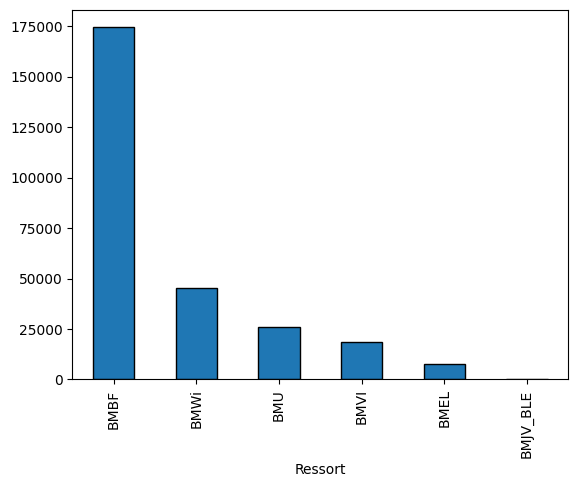

In [16]:
BMBF["Ressort"].value_counts(ascending=False).plot(kind="bar",edgecolor="black");

In [17]:
#There are 174404 records, where the Ressort is BMBF
BMBF[BMBF["Ressort"] == "BMBF"].shape

(174404, 26)

# <center> the column "Fördersumme in EUR" </center>

In [18]:
# many projects are granted with 50.000 EUR 
BMBF["Fördersumme in EUR"].value_counts()

Fördersumme in EUR
50.000,00       2098
7.500,00         555
0,00             471
204.517,00       409
153.388,00       388
                ... 
386.952,00         1
222.724,00         1
922.030,00         1
86.181,00          1
2.078.360,00       1
Name: count, Length: 199701, dtype: int64

In [19]:
# we need to change data type of this column, since all columns of the data set are of type object (string)
BMBF["Fördersumme in EUR"] = BMBF["Fördersumme in EUR"].apply(lambda num: num.split(",")[0].replace(".",""))
BMBF["Fördersumme in EUR"] = BMBF["Fördersumme in EUR"].astype(float)

In [20]:
# top 10 grants with highest grant amounts
BMBF.sort_values(by="Fördersumme in EUR",ascending=False).loc[:,["Zuwendungsempfänger","Thema","Fördersumme in EUR"]].head(10)

,Zuwendungsempfänger,Thema,Fördersumme in EUR
183674,Deutsche Forschungsgemeinschaft e.V. (DFG),Exzellenzinitiative zur Förderung von Wissenschaft und Forschung an deutschen Hochschulen,"3,840,284,917"
192692,Deutsche Forschungsgemeinschaft e.V. (DFG),Verwaltungsvereinbarung zwischen Bund und Ländern über den Hochschulpakt 2020 - Programm zur Finanzierung von Programmpauschalen für von der DFG geförderte Forschungsvorhaben,"2,294,312,000"
200805,Deutsche Forschungsgemeinschaft e.V. (DFG),Verwaltungsvereinbarung zwischen Bund und Ländern über den Hochschulpakt 2020 - Programm zur Finanzierung von Programmpauschalen für von der DFG geförderte Forschungsvorhaben,"2,049,099,650"
35559,KMG Kernbrennstoff-Management Gesellschaft mit beschränkter Haftung,Verbundprojekt: Errichtung des 280-Mw-Snr-Prototyp-Kernkraftwerks (Snr 300),"1,764,399,258"
46565,Studienstiftung des deutschen Volkes e.V.,Begabtenförderung,"1,476,906,041"
116938,Facility for Antiproton and Ion Research in Europe GmbH (FAIR GmbH),FAIR - Facility for Antiproton and Ion Research: Civil Construction der Modularisierten Startversion 0-3,"1,287,489,553"
35556,HOCHTEMPERATUR-KERNKRAFTWERK Gesellschaft mit beschränkter Haftung (HKG). Gemeinsames Europäisches Unternehmen,Verbundprojekt: Errichtung des 300-Mw-Thtr-Prototyp-Kernkraftwerks (THtr 300),"1,091,608,166"
62240,Hans-Böckler-Stiftung,Begabtenförderung,"545,330,836"
204223,Deutscher Akademischer Austauschdienst e.V.,"Förderung des Studenten- und Wissenschaftleraustauschs sowie internationale Kooperation in Lehre und Forschung, Hochschulmarketing.","449,475,195"
62247,Studienstiftung des deutschen Volkes e.V.,Promotionsförderung,"422,452,918"


In [21]:
# summary statistics
BMBF["Fördersumme in EUR"].describe()

count         272,234
mean          599,637
std        11,649,337
min        -4,369,931
25%            64,954
50%           186,194
75%           406,772
max     3,840,284,917
Name: Fördersumme in EUR, dtype: float64

# <center>column Zuwendungsempfänger </center>

In [22]:
# Top 10 Zuwendungsempfänger with highest number of granted projects
BMBF["Zuwendungsempfänger"].value_counts()[:10]

Zuwendungsempfänger
Fraunhofer-Gesellschaft zur Förderung der angewandten Forschung eingetragener Verein    10217
Keine Anzeige aufgrund datenschutzrechtlicher Regelungen.                                3593
Rheinisch-Westfälische Technische Hochschule Aachen                                      3402
Technische Universität München                                                           2976
Max-Planck-Gesellschaft zur Förderung der Wissenschaften e.V.                            2553
Technische Universität Dresden                                                           2484
Technische Universität Berlin                                                            2347
Universität Stuttgart                                                                    2178
Karlsruher Institut für Technologie (KIT)                                                2043
Siemens Aktiengesellschaft                                                               1986
Name: count, dtype: int64

In [23]:
# dict to format float number of groupby object
format_dict = {
    ("Fördersumme in EUR", "sum"): "{:,.0f}", 
    ("Fördersumme in EUR", "mean"): "{:,.0f}",
    ("Fördersumme in EUR", "max"): "{:,.0f}"
}

In [24]:
# Top 10 Zuwendungsempfänger with highest cumulative Fördersumme
Zuw_grouped_df = BMBF.groupby("Zuwendungsempfänger").agg({"Fördersumme in EUR":["sum","mean","max","count"]})
Zuw_grouped_df.sort_values(("Fördersumme in EUR","sum"),ascending=False)[:10].style.format(format_dict).highlight_max(subset=("Fördersumme in EUR"), axis=0, color='lightgreen')


# <center> column Staat </center>

In [25]:
# 136 records without assingment to any country and 12 records = "nicht zuzuordnen"
BMBF.Staat.value_counts(dropna=False)

Staat
Deutschland                               271655
<NA>                                         136
Frankreich                                    69
Belgien                                       60
Israel                                        52
Österreich                                    46
Italien                                       43
Monaco                                        27
Niederlande                                   25
Schweiz                                       24
Vereinigtes Königreich - Großbritanien        16
Dänemark                                      13
nicht zuzuordnen                              12
Vereinigte Staaten von Amerika                 7
Ghana                                          7
Norwegen                                       5
Schweden                                       4
Polen                                          4
Japan                                          3
Tschechische Republik                          3
Lettland      

### some grant topics are in English languages such as in case of Israel

In [26]:
BMBF_Israel = BMBF[BMBF["Staat"]=="Israel"]
BMBF_Israel["lang"] = BMBF_Israel.loc[BMBF_Israel["Staat"]=="Israel","Thema"].apply(detect_language)
BMBF_Israel[BMBF_Israel["lang"]=="en"].shape

(18, 27)

In [27]:
BMBF_Israel[BMBF_Israel["lang"]=="en"].sample(5)

,FKZ,Ressort,Referat,PT,Arb.-Einh.,Zuwendungsempfänger,Gemeindekennziffer,Stadt/Gemeinde,Ort,Bundesland,Staat,Ausführende Stelle,Gemeindekennziffer.1,Stadt/Gemeinde.1,Ort.1,Bundesland.1,Staat.1,Thema,Leistungsplansystematik,Klartext Leistungsplansystematik,Laufzeit von,Laufzeit bis,Fördersumme in EUR,Förderprofil,Verbundprojekt,Förderart,lang
24215,02WT803/0,BMBF,726,PTKA,WTE-W_KA,National Council for Research and Development,99999999,Ausland,Jerusalem/Israel,<NA>,Israel,Technion - Israel Institute of Technology,99999999,Ausland,Haifa/Israel,<NA>,Israel,"Renovation Of Waste Water, Toxicological Studies",FC2013,Gewässerschutztechnologien,01.01.1978,31.12.1981,"104,640",Forschung und Entwicklung zur Daseinsvorsorge,<NA>,PDIR,en
188097,0327559U,BMWi,IIC6,PT-J,ESE4,The Hebrew University of Jerusalem,99999999,Ausland,Jerusalem/Israel,<NA>,Israel,The Hebrew University of Jerusalem,99999999,Ausland,Jerusalem/Israel,<NA>,Israel,Verbundprojekt: Defect-tolerant Solar Cell Materials: Putting Grain Boundaries to Work in Thin Film Chalcopyrite Solar Cells,EB1799,Sonstiges im Rahmen der erneuerbaren Energiequellen,01.03.2008,31.08.2011,"68,766",Technologie- und Innovationsförderung,Defect-Tolerant Solar Cell Materials,PDIR,en
188099,0327559V,BMWi,IIC6,PT-J,ESE4,Tel Aviv University,99999999,Ausland,Tel Aviv/Israel,<NA>,Israel,Tel Aviv University,99999999,Ausland,Tel Aviv/Israel,<NA>,Israel,Verbundprojekt: Defect-tolerant Solar Cell Materials: Putting Grain Boundaries to Work in Thin Film Chalcopyrite Solar Cells,EB1799,Sonstiges im Rahmen der erneuerbaren Energiequellen,01.03.2008,31.08.2011,"138,573",Technologie- und Innovationsförderung,Defect-Tolerant Solar Cell Materials,PDIR,en
24325,02WT032/5,BMBF,726,PTKA,WTE-W_KA,National Council for Research and Development,99999999,Ausland,Jerusalem/Israel,<NA>,Israel,Tahal Water Planning For Israel Ltd. - Sewage Reclamation Department,99999999,Ausland,Tel Aviv/Israel,<NA>,Israel,Waste Water Reclamation By Groundwater Recharge Via Spreading Basins,FC3099,Übergreifende und sonstige Vorhaben der Wasser-/Abfallbehandlung,01.10.1981,31.12.1982,"59,678",Forschung und Entwicklung zur Daseinsvorsorge,<NA>,PDIR,en
24214,02WT802/9,BMBF,726,PTKA,WTE-W_KA,National Council for Research and Development,99999999,Ausland,Jerusalem/Israel,<NA>,Israel,The Hebrew University of Jerusalem,99999999,Ausland,Jerusalem/Israel,<NA>,Israel,"Renovation Of Waste Water, Analytical Investigations",FC2013,Gewässerschutztechnologien,01.01.1978,31.12.1980,"3,486",Forschung und Entwicklung zur Daseinsvorsorge,<NA>,PDIR,en


#  <center> column Bundesland </center>

In [28]:
# sort Bundesland according to the sum of total grant amount
Bu_group_df = BMBF.groupby("Bundesland").agg({"Fördersumme in EUR":["sum","mean","max","count"]})
Bu_group_df.sort_values(("Fördersumme in EUR","sum"),ascending=False).style.format(format_dict).highlight_max(subset=("Fördersumme in EUR"), axis=0, color='lightgreen')

In [29]:
# top 10 Ort according to the sum of total grant amount
Ort_group_df = BMBF.groupby("Ort").agg({"Fördersumme in EUR":["sum","mean","max","count"]})
Ort_group_df.sort_values(("Fördersumme in EUR","sum"),ascending=False)[:10].style.highlight_max(subset=("Fördersumme in EUR"), axis=0, color='lightgreen').format(format_dict)

## Many columns including Referat, PT, Arb.-Einh., Gemeindekennziffer, Leistungsplansystematik, Förderprofil, Förderart, Verbundprojekt contain high redundent code, some contains lot of missing values, thus not really interesting for the cluster analysis as well as data enrichment <br>

In [30]:
for col in["Referat", "PT", "Arb.-Einh.", "Gemeindekennziffer", "Leistungsplansystematik","Klartext Leistungsplansystematik", "Förderprofil", "Förderart", "Verbundprojekt" ]: 
    print(f"number of distinct values in {col} :", BMBF[col].value_counts().shape[0])
    print(f"number of missing value in {col} :", BMBF[col].isnull().sum())
    print("-" * 40)

number of distinct values in Referat : 283
number of missing value in Referat : 0
----------------------------------------
number of distinct values in PT : 40
number of missing value in PT : 0
----------------------------------------
number of distinct values in Arb.-Einh. : 283
number of missing value in Arb.-Einh. : 27928
----------------------------------------
number of distinct values in Gemeindekennziffer : 6390
number of missing value in Gemeindekennziffer : 102
----------------------------------------
number of distinct values in Leistungsplansystematik : 1640
number of missing value in Leistungsplansystematik : 6
----------------------------------------
number of distinct values in Klartext Leistungsplansystematik : 1552
number of missing value in Klartext Leistungsplansystematik : 1360
----------------------------------------
number of distinct values in Förderprofil : 6
number of missing value in Förderprofil : 193
----------------------------------------
number of distinct

In [31]:
BMBF["Ausführende Stelle"].value_counts().shape[0]

81268

# <center> column Thema </center>

In [32]:
# count words in column Thema
BMBF["len_Thema"] = BMBF["Thema"].apply(lambda text: len(text.split()))

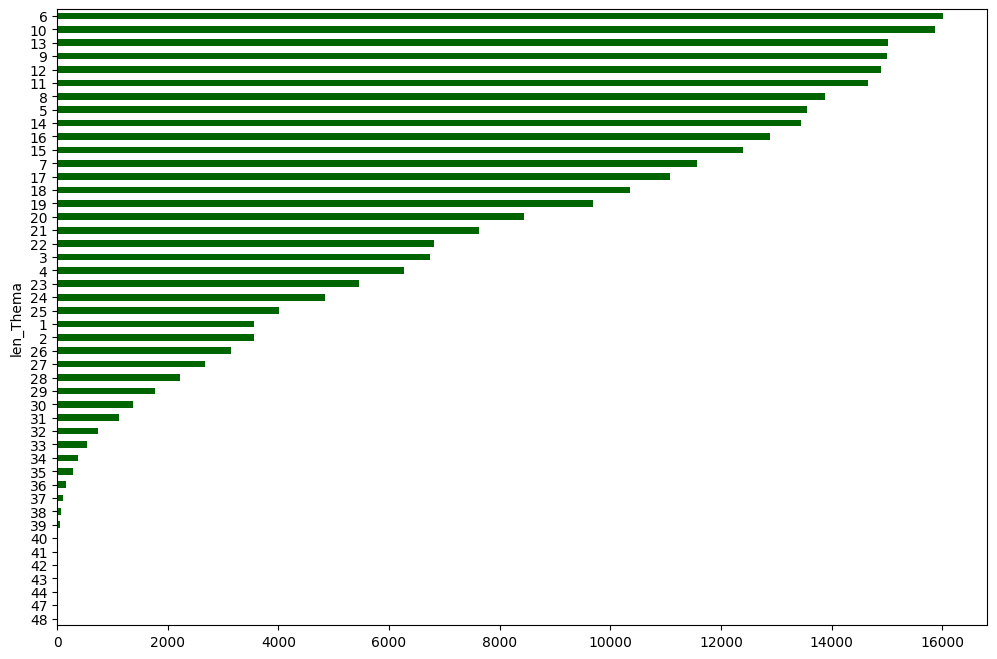

In [33]:
# many topics have a topic length between 5 an 15 words count
plt.figure(figsize=(12, 8))
BMBF["len_Thema"].value_counts(ascending=True).plot(kind="barh",color = "darkgreen");
plt.show()

In [34]:
# summary statistics
BMBF["len_Thema"].describe()

count   272,234
mean         13
std           7
min           1
25%           8
50%          13
75%          18
max          48
Name: len_Thema, dtype: float64

In [35]:
# size of total text in column Thema
total_text = ' '.join(BMBF.loc[:,"Thema"].values)
print(len(total_text))

35741689


In [36]:
# 35.741.689 tokens are to large to process, we need to remove stopwords, punctuations and perform stemming first
%time stems = preprocess(total_text)

CPU times: user 21.5 s, sys: 204 ms, total: 21.7 s
Wall time: 21.6 s


In [37]:
# only 2.464.267 word stems
len(stems)

2464267

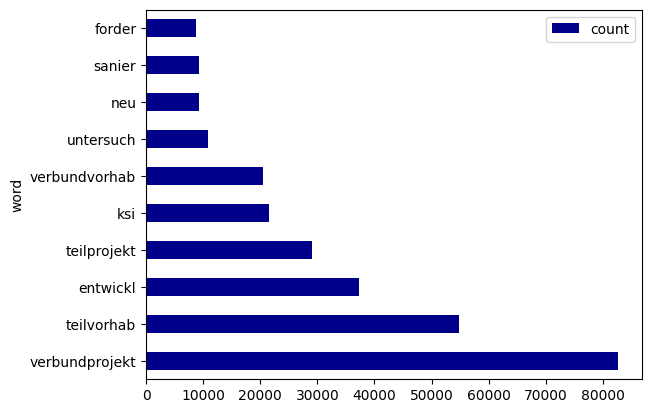

In [38]:
# count word and plot 10 most common words 
word_counts = Counter(stems)
most_common_words = word_counts.most_common(10)
pd.DataFrame(most_common_words[:10],columns=["word","count"]).set_index("word").plot(kind="barh",color = "darkblue");

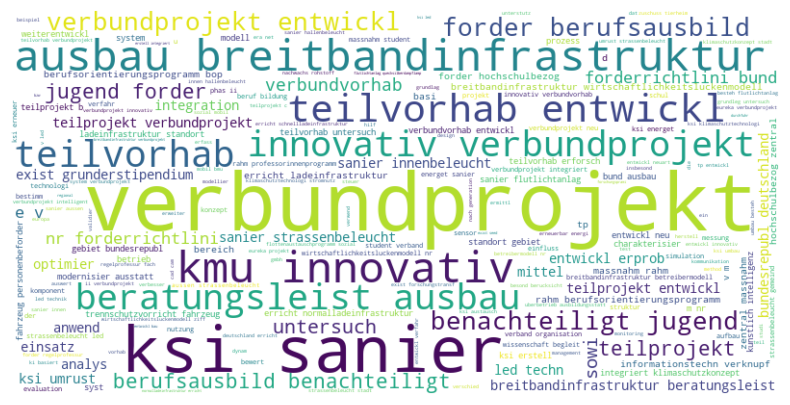

In [39]:
def generate_wordcloud():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join([w for w in stems]))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off') 
    plt.show()
generate_wordcloud()

In [40]:
# and 263.168 distinct word stems
stems = set(stems)
print(len(stems))

263168


#save cleaned BMBF for later use
BMBF.to_csv("../data/cleanedBMBF.csv",index= False)